<a href="https://colab.research.google.com/github/Dongjin-1203/NLP-Study-code/blob/main/Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 어텐션 매커니즘 실습

## 1. 어휘 사전 정의

영어와 한국어 어휘 사전(vocab_en, vocab_ko)을 정의하고,
각 단어가 고유한 인덱스를 가지도록 구성하는 방법을 학습합니다.

In [1]:
vocab_en = {
    "she": 0,
    "is": 1,
    "reading": 2,
    "a": 3,
    "book": 4
}

vocab_ko = {
    "그녀는": 0,
    "책을": 1,
    "읽고": 2,
    "있다": 3
}

print(f"영어 단어장 크기: {len(vocab_en)}")
print(f"한국어 단어장 크기: {len(vocab_ko)}")
print("\n영어 단어장:")
print(list(vocab_en.items()))
print("\n한국어 단어장:")
print(list(vocab_ko.items()))

영어 단어장 크기: 5
한국어 단어장 크기: 4

영어 단어장:
[('she', 0), ('is', 1), ('reading', 2), ('a', 3), ('book', 4)]

한국어 단어장:
[('그녀는', 0), ('책을', 1), ('읽고', 2), ('있다', 3)]


## 2. 영어 문장의 인덱스 변환
영어 문장을 단어 단위로 나누고, 각 단어를 미리 정의된 어휘 사전(vocab_en)을 사용해 인덱스로 변환합니다.

이를 통해 문장을 숫자 인덱스의 시퀀스로 바꾸는 과정을 이해하고, 자연어 처리 모델의 입력 데이터를 준비하는 방법을 익힙니다.

[문제 1]
- src_sentence는 소스 문장으로, 이를 단어 단위로 분리(split)합니다.
- 각 단어는 어휘 사전(vocab_en)을 참조하여 고유 인덱스 값으로 변환됩니다.
- 최종 결과는 torch.tensor를 사용해 텐서 형태로 저장합니다.

In [2]:
import torch
import torch.nn as nn

src_sentence = "she is reading a book"
input_indices = torch.tensor([vocab_en[word] for word in src_sentence.split()])

print(f"인덱스 변환 결과 : {input_indices}")
print(f"'input_indices' shape : {input_indices.shape}")
print("영어 소스 문장의 단어별 인덱스:", [(word, vocab_en[word]) for word in src_sentence.split()])

인덱스 변환 결과 : tensor([0, 1, 2, 3, 4])
'input_indices' shape : torch.Size([5])
영어 소스 문장의 단어별 인덱스: [('she', 0), ('is', 1), ('reading', 2), ('a', 3), ('book', 4)]


## 3. 문장의 임베딩 변환 과정
단어를 임베딩 벡터로 변환해보자.
이를 통해 고유한 단어 인덱스를 고정된 차원의 임베딩 벡터로 변환하고, 변환된 데이터를 모델에 적합한 형태로 준비합니다.

[문제 2]
- nn.Embedding은 단어 인덱스를 임베딩 벡터로 변환하는 PyTorch 레이어입니다. 어휘 사전의 크기(len(vocab_en) 또는 len(vocab_ko))와 임베딩 차원(embedding_dim)을 정의하여 레이어를 생성합니다.
- encoder_embedding에 의해 생성된 텐서는 문장의 각 단어를 임베딩 벡터로 변환한 결과입니다.
- 모델 입력 데이터는 (batch_size, sequence_length, embedding_dim) 형태로 변환되어야 합니다.
 - 이를 위해 현재 텐서에 배치 축을 추가해야 합니다.
 - 첫 번째 축(배치 축)에 unsqueeze 함수를 통해 차원을 추가하여 모델 입력 형태에 맞춥니다.

In [3]:
# 임베딩 차원, 은닉상태 크기 정의
embedding_dim = 8
hidden_dim = 8

# 임베딩 레이어 정의
encoder_embedding = nn.Embedding(len(vocab_en), embedding_dim)      # len(vocab_en): 영어 단어장 크기
decoder_embedding = nn.Embedding(len(vocab_ko), embedding_dim)      # len(vocab_ko): 한국어 단어장 크

encoder_inputs = encoder_embedding(input_indices).unsqueeze(0)

print(f"엔코더 입력 텐서 shape : {encoder_inputs.shape}")
print("\n문장의 단어별 임베딩 벡터:")
for word, emb in zip(src_sentence.split(), encoder_inputs[0]):
    print(f"\n단어: {word:8}")
    print(f"임베딩 벡터: {emb}")

엔코더 입력 텐서 shape : torch.Size([1, 5, 8])

문장의 단어별 임베딩 벡터:

단어: she     
임베딩 벡터: tensor([ 1.5495, -0.1794, -1.8874,  1.7775, -1.3420,  1.8191,  2.1706, -1.6927],
       grad_fn=<UnbindBackward0>)

단어: is      
임베딩 벡터: tensor([ 2.3890e-03, -2.4928e+00,  2.2205e+00, -6.9185e-01, -5.3041e-01,
         1.7850e-01,  1.0534e+00, -3.3853e-01], grad_fn=<UnbindBackward0>)

단어: reading 
임베딩 벡터: tensor([ 0.5510,  0.5596, -0.7170, -0.3088,  0.8270, -0.3231,  0.8788,  1.3114],
       grad_fn=<UnbindBackward0>)

단어: a       
임베딩 벡터: tensor([-0.3083,  1.2410, -2.3244, -1.4596,  0.4800,  0.9140,  0.1214, -2.4894],
       grad_fn=<UnbindBackward0>)

단어: book    
임베딩 벡터: tensor([ 1.4897, -0.7375,  0.5847, -0.1397, -1.0452, -0.1769,  0.6986, -0.7107],
       grad_fn=<UnbindBackward0>)


## 4. 엔코더 출력 및 은닉상태 가정
이번 스텝에서는 LSTM 기반 엔코더의 출력(encoder_outputs), 은닉 상태(encoder_hidden), 그리고 셀 상태(encoder_cell)를 정의하는 과정을 학습합니다.
이 과정을 통해 엔코더 출력 및 상태를 모델의 입력으로 어떻게 활용하는지 이해할 수 있습니다.

[문제 3]

- `torch.unsqueeze`는 텐서의 특정 축에 차원을 추가할 때 사용됩니다. 여기서는 배치 차원을 추가하여 모델 입력에 적합한 형태로 변환합니다.
- `src_sentence.split()`을 사용하여 문장을 단어 단위로 나누고, 각 단어와 대응하는 문맥 벡터를 반복문에서 출력합니다.

In [4]:
# LSTM 기반 엔코더의 출력, 히든,셀 스테이트 가정
encoder_outputs = torch.tensor([
    [0.7, 0.2, 0.4, 0.6, 0.3, 0.1, 0.2, 0.4],  # she의 문맥 벡터
    [0.4, 0.5, 0.3, 0.5, 0.2, 0.3, 0.6, 0.1],  # is의 문맥 벡터
    [0.8, 0.6, 0.4, 0.5, 0.7, 0.2, 0.3, 0.5],  # reading의 문맥 벡터
    [0.3, 0.8, 0.2, 0.3, 0.5, 0.4, 0.1, 0.6],  # ..
    [0.1, 0.4, 0.6, 0.7, 0.2, 0.5, 0.4, 0.3]
]).unsqueeze(0)

# LSTM의 마지막 단계의 hidden state, cell state 상태 가정
encoder_hidden = torch.tensor([[0.5, 0.4, 0.6, 0.3, 0.7, 0.2, 0.4, 0.5]]).unsqueeze(0)
encoder_cell = torch.tensor([[0.4, 0.5, 0.3, 0.6, 0.2, 0.7, 0.4, 0.3]]).unsqueeze(0)

print(f"엔코더 출력 크기: {encoder_outputs.shape}")
print(f"히든 스테이트 크기: {encoder_hidden.shape}  셀 스테이트 크기: {encoder_cell.shape}")

print("\n엔코더 각 단계의 가정된 출력 벡터:")
for word, context in zip(src_sentence.split(), encoder_outputs[0]):
    print(f"\n단어: {word:8}")
    print(f"문맥 벡터: {context}")

엔코더 출력 크기: torch.Size([1, 5, 8])
히든 스테이트 크기: torch.Size([1, 1, 8])  셀 스테이트 크기: torch.Size([1, 1, 8])

엔코더 각 단계의 가정된 출력 벡터:

단어: she     
문맥 벡터: tensor([0.7000, 0.2000, 0.4000, 0.6000, 0.3000, 0.1000, 0.2000, 0.4000])

단어: is      
문맥 벡터: tensor([0.4000, 0.5000, 0.3000, 0.5000, 0.2000, 0.3000, 0.6000, 0.1000])

단어: reading 
문맥 벡터: tensor([0.8000, 0.6000, 0.4000, 0.5000, 0.7000, 0.2000, 0.3000, 0.5000])

단어: a       
문맥 벡터: tensor([0.3000, 0.8000, 0.2000, 0.3000, 0.5000, 0.4000, 0.1000, 0.6000])

단어: book    
문맥 벡터: tensor([0.1000, 0.4000, 0.6000, 0.7000, 0.2000, 0.5000, 0.4000, 0.3000])


## 5. 디코더 초기 상태 설정
디코더의 초기 상태를 설정하고 첫 번째 입력 단어를 임베딩 벡터로 변환합니다.
디코더는 LSTM 레이어로 구성되며, 초기 입력은 단어 하나로 시작됩니다. 이를 통해 디코더의 구조와 초기화를 이해할 수 있습니다.

[문제 4]
- nn.LSTM은 PyTorch의 순환 신경망 레이어로, 입력 차원(input_size), 은닉 상태 차원(hidden_size), 그리고 batch_first=True 설정을 통해 배치 크기를 첫 번째 차원으로 맞춥니다.
- 디코더의 첫 번째 입력 단어는 vocab_ko 사전에서 "그녀는"의 인덱스를 참조하여 설정합니다. 이는 디코더가 처음으로 처리할 한국어 단어입니다.

In [5]:
decoder = nn.LSTM(embedding_dim + hidden_dim, hidden_dim, batch_first=True)
first_decoder_input = torch.tensor([[vocab_ko["그녀는"]]])
decoder_embedded = decoder_embedding(first_decoder_input)

print(f"디코더 첫 입력 단어: 그녀는 (인덱스: {first_decoder_input.item()})")
print(f"임베딩된 입력 크기: {decoder_embedded.shape}")

디코더 첫 입력 단어: 그녀는 (인덱스: 0)
임베딩된 입력 크기: torch.Size([1, 1, 8])


## 6.Badhanau Attention Mechanism 구현  
###6.1 어텐션 레이어 정의

이번 스텝에서는 어텐션 메커니즘에 사용되는 두 레이어, 투영 레이어(attn_projection)와 스코어 레이어(attention_v)를 정의합니다.
이 과정을 통해 어텐션에서 입력 차원을 변환하고, 가중치를 계산하는 과정을 이해할 수 있습니다.

[문제 5]
- `nn.Linear`는 선형 변환을 수행하는 PyTorch의 레이어입니다. 입력 차원과 출력 차원을 인수로 지정하여 생성합니다.
- `attn_projection`은 어텐션 계산에 필요한 차원 변환을 수행하며, 입력은 엔코더 출력과 디코더의 은닉 상태를 결합한 벡터(`hidden_dim * 2`), 출력은 hidden_dim입니다.
- `attention_v`는 가중치 계산을 위한 스코어 레이어로, 입력 차원은 `hidden_dim`, 출력 차원은 1로 설정합니다.

In [6]:
attn_projection = nn.Linear(hidden_dim * 2, hidden_dim)
attention_v = nn.Linear(hidden_dim,1, bias=False)


print("\n=== 어텐션 레이어 구조 ===")
print("1. 투영 레이어 (attn_projection):")
print(f"  입력 -> 출력: ({hidden_dim * 2}) -> ({hidden_dim})")

print("\n2. 스코어 레이어 (attention_v):")
print(f"  입력 -> 출력: ({hidden_dim}) -> (1)")


=== 어텐션 레이어 구조 ===
1. 투영 레이어 (attn_projection):
  입력 -> 출력: (16) -> (8)

2. 스코어 레이어 (attention_v):
  입력 -> 출력: (8) -> (1)


### 6.2 디코더 은닉 (hidden state) 복제와 결합

디코더의 은닉 상태를 변환하고, 엔코더 출력과 결합한다.
이를 통해 디코더 상태를 엔코더 출력과 동일한 시퀀스 길이로 확장하고 결합하여 어텐션 계산의 입력 형태를 준비할 수 있습니다.

[문제 6]
- `transpose`는 텐서의 두 차원을 교환합니다. 여기서는 디코더 은닉 상태의 첫 번째와 두 번째 차원을 교환하여 `(batch_size, hidden_dim)`에서 `(hidden_dim, batch_size)`로 변환합니다.
- `repeat`는 텐서를 특정 차원으로 확장합니다. 엔코더 출력의 길이만큼 디코더 상태를 복제하여 시퀀스 길이를 맞춥니다.
- `torch.cat`은 여러 텐서를 지정된 차원`(dim)`을 따라 결합합니다. 여기서는 디코더 상태와 엔코더 출력을 결합하여 새로운 상태를 생성합니다.

In [7]:
decoder_hidden_transposed = encoder_hidden.transpose(0, 1)      # .transpose(0, 1): 1번째와 2번째 차원의 순서를 바꾼다.
# 첫 단계 디코더에는 이전 은닉 상태ㅏ 없어 엔코더 마지막 은닉상태를 사용하기 위함.
print("Transpose 후 shape:", decoder_hidden_transposed.shape)

# 엔코더 출력 길이만큼 복제
decoder_hidden_expanded = decoder_hidden_transposed.repeat(1, encoder_outputs.size(1), 1)
"""
.repeat(1, encoder_outputs.size(1), 1)
1: 배치 차원을 1번 반복
encoder_outputs.size(1): 입력 문장의 단어 수(5)만큼 반복
1: 은닉 상태의 차원을 1번 반복
"""

# 디코더 상태와 엔코더 출력 결합
combined_states = torch.cat([decoder_hidden_expanded, encoder_outputs], dim=2)

print("원본 은닉 상태 shape:", encoder_hidden.shape)
print("Repeat 후 확장된 은닉상태 shape:", decoder_hidden_expanded.shape)
print("결합된 상태 shape:", combined_states.shape)

Transpose 후 shape: torch.Size([1, 1, 8])
원본 은닉 상태 shape: torch.Size([1, 1, 8])
Repeat 후 확장된 은닉상태 shape: torch.Size([1, 5, 8])
결합된 상태 shape: torch.Size([1, 5, 16])


### 6.3 어텐션 스코어 계산 (Attention Score Computation)

이번 스텝에서는 어텐션 스코어를 계산하는 과정을 학습합니다.
결합된 상태를 기반으로 어텐션 메커니즘에서 사용하는 가중치를 계산하는 과정을 이해할 수 있습니다.

[문제 7]
- `torch.tanh`는 텐서의 각 요소에 하이퍼볼릭 탄젠트를 적용하는 활성화 함수입니다. 여기서는 어텐션 투영 결과`(attn_projection)`에 비선형 변환을 적용합니다.
- `squeeze`는 지정된 차원`(dim=-1)`을 제거하여 텐서의 크기를 축소합니다. 여기서는 어텐션 점수를 최종적으로 `(batch_size, sequence_length)` 형태로 변환합니다.

In [8]:
# 어텐션 스코어 계산 과정
attention_scores_prep = torch.tanh(attn_projection(combined_states))
attention_scores = attention_v(attention_scores_prep).squeeze(-1)

print("스코어 계산 단계:")
print(f"  중간 변환 shape: {attention_scores_prep.shape}")
print(f"  최종 스코어 shape: {attention_scores.shape}")

print("각 단어의 어텐션 스코어:")
for word, score in zip(src_sentence.split(), attention_scores[0]):
    print(f"  {word:8}: {score.item():>8.4f}")

스코어 계산 단계:
  중간 변환 shape: torch.Size([1, 5, 8])
  최종 스코어 shape: torch.Size([1, 5])
각 단어의 어텐션 스코어:
  she     :  -0.1637
  is      :  -0.0967
  reading :  -0.1878
  a       :  -0.1567
  book    :  -0.0871


### 6.4 어텐션 가중치(Attention Weight) 및 컨텍스트 벡터(Context Vector) 계산

어텐션 가중치를 계산하고, 이를 기반으로 컨텍스트 벡터를 생성하는 과정을 학습합니다.
어텐션 메커니즘에서 가중치를 정규화하고, 컨텍스트 벡터를 계산하는 방법을 이해할 수 있습니다.

[문제 8]
- `F.softmax`는 텐서를 확률 분포로 정규화합니다. 여기서는 어텐션 스코어를 정규화하여 어텐션 가중치를 계산하며, 차원`(dim=1)`을 따라 적용됩니다.
- `unsqueeze`는 텐서에 새로운 차원을 추가합니다. 여기서는 어텐션 가중치에 배치 차원`(dim=1)`을 추가합니다.
`torch.bmm`는 배치 행렬 곱셈을 수행합니다. 여기서는 어텐션 가중치와 엔코더 출력을 곱하여 컨텍스트 벡터를 계산합니다.

In [9]:
import torch.nn.functional as F

# 어텐션 가중치 계산
attention_weights = F.softmax(attention_scores, dim=1)

# 컨텍스트 벡터 계산
attention_weights_expanded = attention_weights.unsqueeze(1)
# 행렬곱을 위해 3차원 텐서 형태 필요. 중간 차원은 나중에 인코더 출력값과 곱할 수 있는 형태를 만들기 위한 차원
context_vector = torch.bmm(attention_weights_expanded, encoder_outputs)

print("\n=== 어텐션 가중치 및 컨텍스트 벡터 계산 과정 ===")
print("1. 어텐션 가중치 계산:")
print(f"  attention_weights shape: {attention_weights.shape}")
print(f"  attention_weights 내용:\n{attention_weights}")

print("\n2. 어텐션 가중치 확장:")
print(f"  attention_weights_expanded shape: {attention_weights_expanded.shape}")
print(f"  attention_weights_expanded 내용:\n{attention_weights_expanded}")

print("\n3. 컨텍스트 벡터 계산:")
print(f"  context_vector shape: {context_vector.shape}")
print(f"  context_vector 내용:\n{context_vector}")


=== 어텐션 가중치 및 컨텍스트 벡터 계산 과정 ===
1. 어텐션 가중치 계산:
  attention_weights shape: torch.Size([1, 5])
  attention_weights 내용:
tensor([[0.1949, 0.2084, 0.1902, 0.1962, 0.2104]], grad_fn=<SoftmaxBackward0>)

2. 어텐션 가중치 확장:
  attention_weights_expanded shape: torch.Size([1, 1, 5])
  attention_weights_expanded 내용:
tensor([[[0.1949, 0.2084, 0.1902, 0.1962, 0.2104]]],
       grad_fn=<UnsqueezeBackward0>)

3. 컨텍스트 벡터 계산:
  context_vector shape: torch.Size([1, 1, 8])
  context_vector 내용:
tensor([[[0.4518, 0.4984, 0.3820, 0.5223, 0.3735, 0.3037, 0.3248, 0.3747]]],
       grad_fn=<BmmBackward0>)


## 7. 디코더 입력 결합 및 디코더 스텝 실행
디코더의 입력 데이터를 결합하고, 디코더의 한 스텝을 실행하는 과정을 학습합니다.
이를 통해 컨텍스트 벡터와 임베딩된 입력 데이터를 결합하여 디코더 입력으로 사용하는 방법을 이해할 수 있습니다.

[문제 9]
- `torch.cat`은 텐서를 지정된 축`(dim)`을 따라 결합합니다. 여기서는 디코더 임베딩 벡터`(decoder_embedded)`와 컨텍스트 벡터`(context_vector)`를 결합합니다.
- 디코더 실행에서는 결합된 입력 데이터`(decoder_input_combined)`와 엔코더의 마지막 히든 상태, 셀 상태를 사용합니다.
- 디코더 출력`(decoder_output)`과 새로운 히든 상태`(decoder_hidden)`, 셀 상태`(decoder_cell)`를 반환합니다.

In [10]:
# 디코더 입력과 컨텍스트 벡터 결합
decoder_input_combined = torch.cat([decoder_embedded, context_vector], dim=2)

# 디코더의 첫 스텝 실행
decoder_output, (decoder_hidden, decoder_cell) = decoder(
    decoder_input_combined,
    (encoder_hidden, encoder_cell)
)

print("\n=== 디코더 입력 결합 및 디코더 스텝 실행 결과 ===")
print("1. 디코더 입력 결합:")
print(f"  decoder_input_combined shape: {decoder_input_combined.shape}")
print(f"  decoder_input_combined 내용:\n{decoder_input_combined}")

print("\n2. 디코더 출력:")
print(f"  decoder_output shape: {decoder_output.shape}")
print(f"  decoder_output 내용:\n{decoder_output}")

print("\n3. 디코더 히든 상태:")
print(f"  decoder_hidden shape: {decoder_hidden.shape}")
print(f"  decoder_hidden 내용:\n{decoder_hidden}")

print("\n4. 디코더 셀 상태:")
print(f"  decoder_cell shape: {decoder_cell.shape}")
print(f"  decoder_cell 내용:\n{decoder_cell}")


=== 디코더 입력 결합 및 디코더 스텝 실행 결과 ===
1. 디코더 입력 결합:
  decoder_input_combined shape: torch.Size([1, 1, 16])
  decoder_input_combined 내용:
tensor([[[-1.8764,  1.1168,  0.8706, -0.6572,  0.2029,  0.3944,  0.0770,
           1.2548,  0.4518,  0.4984,  0.3820,  0.5223,  0.3735,  0.3037,
           0.3248,  0.3747]]], grad_fn=<CatBackward0>)

2. 디코더 출력:
  decoder_output shape: torch.Size([1, 1, 8])
  decoder_output 내용:
tensor([[[ 0.1153,  0.2179, -0.1035,  0.0122, -0.1161, -0.0481, -0.1033,
           0.0405]]], grad_fn=<TransposeBackward0>)

3. 디코더 히든 상태:
  decoder_hidden shape: torch.Size([1, 1, 8])
  decoder_hidden 내용:
tensor([[[ 0.1153,  0.2179, -0.1035,  0.0122, -0.1161, -0.0481, -0.1033,
           0.0405]]], grad_fn=<StackBackward0>)

4. 디코더 셀 상태:
  decoder_cell shape: torch.Size([1, 1, 8])
  decoder_cell 내용:
tensor([[[ 0.2324,  0.3622, -0.1409,  0.0710, -0.2013, -0.0952, -0.1370,
           0.0856]]], grad_fn=<StackBackward0>)


## 8. 출력층 정의 및 다음 단어 예측
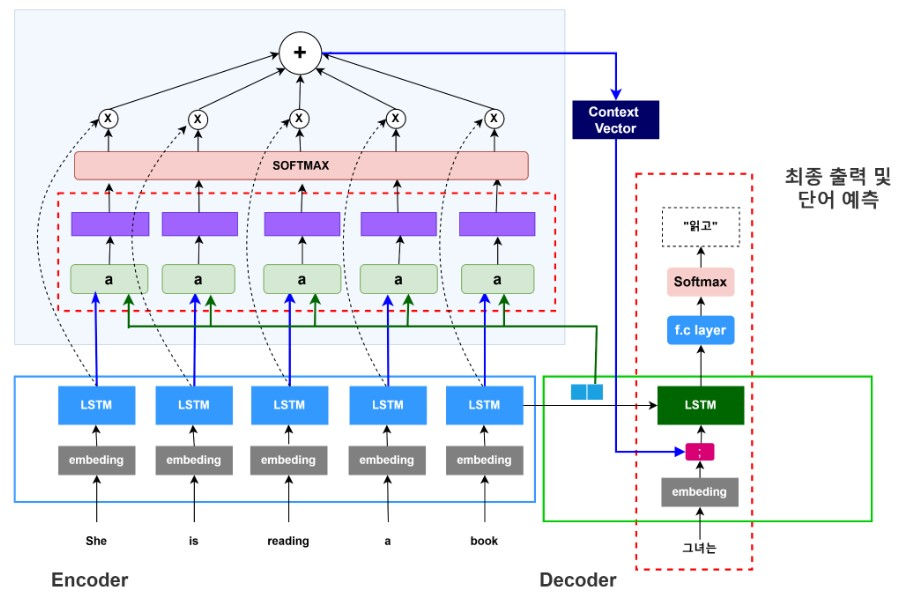
출력층을 정의하고 디코더의 다음 단어를 예측해봅시다.
디코더 출력과 컨텍스트 벡터를 결합하여 단어의 확률 분포를 계산하고, 이를 기반으로 다음 단어를 예측합니다.

[문제]
- `nn.Linear`는 출력층을 정의하는 선형 변환 레이어입니다. 입력 차원은 디코더 출력과 컨텍스트 벡터의 결합 차원`(hidden_dim * 2)`이며, 출력 차원은 한국어 어휘 사전`(vocab_ko)`의 크기입니다.
- `torch.cat`은 텐서를 지정된 차원`(dim=1)`을 따라 결합합니다. 여기서는 디코더 출력과 컨텍스트 벡터를 결합합니다.
- `F.softmax`는 확률 분포를 계산하는 함수입니다. 여기서는 출력 벡터`(output_vector)`를 확률로 변환합니다.
- `argmax`는 확률 분포에서 가장 높은 확률을 가진 인덱스를 반환합니다.
- `vocab_ko.keys()`는 어휘 사전의 단어 목록을 반환합니다. 반환된 인덱스를 기반으로 단어를 예측합니다.

In [11]:
# 출력층 정의
output_layer = nn.Linear(hidden_dim * 2, len(vocab_ko))

# 예측 벡터 생성
combined_output = torch.cat([decoder_output.squeeze(1), context_vector.squeeze(1)], dim=1)
output_vector = output_layer(combined_output)
output_probs = F.softmax(output_vector, dim=-1)

predicted_idx = output_probs.argmax(dim=-1)
predicted_word = list(vocab_ko.keys())[predicted_idx.item()]

print("\n=== 출력층 정의 및 다음 단어 예측 결과 ===")
print("1. 결합된 출력 (combined_output):")
print(f"  shape: {combined_output.shape}")
print(f"  내용:\n{combined_output}\n")

print("2. 출력 벡터 (output_vector):")
print(f"  shape: {output_vector.shape}")
print(f"  내용:\n{output_vector}\n")

print("3. 확률 분포 (output_probs):")
print(f"  shape: {output_probs.shape}")
print(f"  내용:\n{output_probs}\n")

print(f"4. 예측된 단어 인덱스: {predicted_idx.item()}")
print(f"5. 예측된 단어: '{predicted_word}'")


=== 출력층 정의 및 다음 단어 예측 결과 ===
1. 결합된 출력 (combined_output):
  shape: torch.Size([1, 16])
  내용:
tensor([[ 0.1153,  0.2179, -0.1035,  0.0122, -0.1161, -0.0481, -0.1033,  0.0405,
          0.4518,  0.4984,  0.3820,  0.5223,  0.3735,  0.3037,  0.3248,  0.3747]],
       grad_fn=<CatBackward0>)

2. 출력 벡터 (output_vector):
  shape: torch.Size([1, 4])
  내용:
tensor([[-0.0983,  0.2324, -0.0131, -0.1537]], grad_fn=<AddmmBackward0>)

3. 확률 분포 (output_probs):
  shape: torch.Size([1, 4])
  내용:
tensor([[0.2259, 0.3144, 0.2460, 0.2137]], grad_fn=<SoftmaxBackward0>)

4. 예측된 단어 인덱스: 1
5. 예측된 단어: '책을'
